## simulate diffraction pattern

In [2]:
# Import all needed packages
import os
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import py4DSTEM
import ase.io
import abtem
import matplotlib
import mplcyberpunk
import scipy
import h5py

# Custom functions used in this script
from FunctionPackageOM import User_Functions, Ollis_Functions
from FunctionPackageOM.cepstral import browser
from FunctionPackageOM.Plot_Style import Plot_Style_OM_activate

# Load custom plot style
Plot_Style_OM_activate(white_bkg_for_visualization=True)

# Uncomment the following line to use cyberpunk style instead
# plt.style.use('cyberpunk')

# Note: This line is specific to Jupyter Notebooks
# Uncomment if running in Jupyter
%matplotlib ipympl

# Print the py4DSTEM version
print(py4DSTEM.__version__)

0.14.17


In [14]:
## PEA2PbI4
fp = '//masc_shared/ag_volz/Oliver_Maßmeyer/CIF_Files/Perovskites'
#fn_cif = 'PEA2PbI4_unrefined.cif'
fn_cif = 'PEA2PBI4_Ke-zhao.cif'

filepath_cif = os.path.join(fp,fn_cif)

ase_atoms = ase.io.read(filepath_cif)




crystal system 'triclinic' is not interpreted for space group Spacegroup(2, setting=1). This may result in wrong setting!


Text(0.5, 0.98, 'TAPP Molecule Structure')

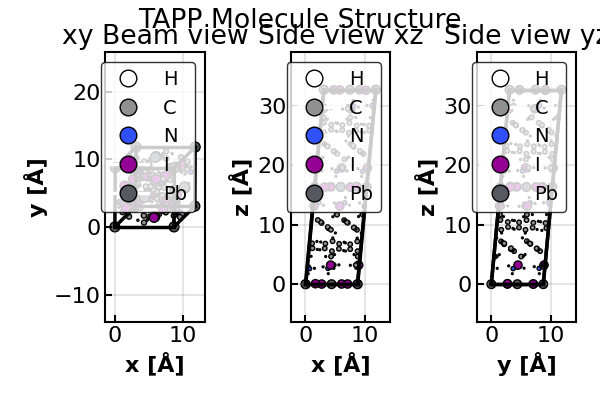

In [15]:
## Use abtem for visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(ase_atoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(ase_atoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(ase_atoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('TAPP Molecule Structure')

This Atoms object contains occupancy information but it will be ignored.


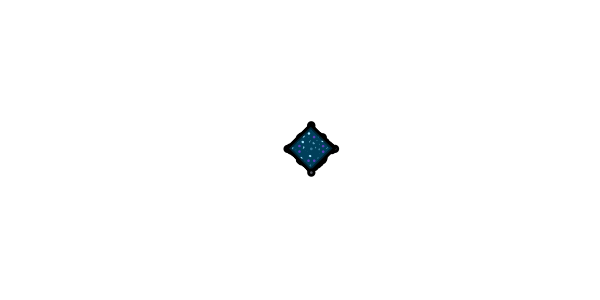

In [16]:
## Convert the Ase cell into py4dstem crystal
crystal = py4DSTEM.process.diffraction.Crystal.from_ase(ase_atoms)


#plot the desired Zone axis
crystal.plot_structure(
    zone_axis_lattice=(0,0,1),
    figsize=(6,3),
    camera_dist = 6,
)


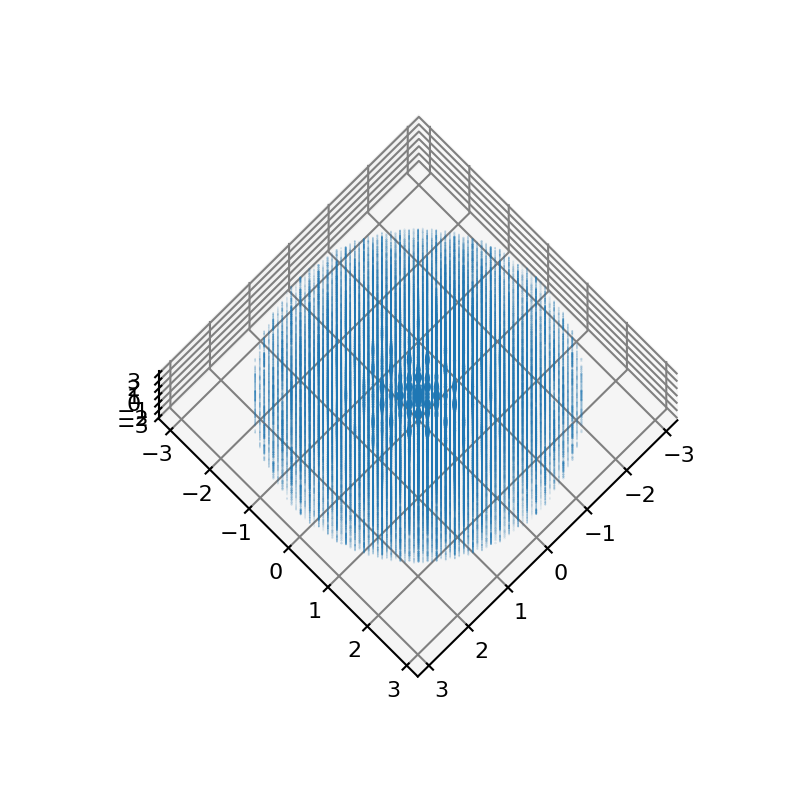

In [17]:
# Calculate structure factors
k_max = 3


(q_SF, I_SF) = crystal.calculate_structure_factors(
    k_max,
    tol_structure_factor = 1e-4,
    return_intensities = True,
)

fig, ax = crystal.plot_structure_factors(zone_axis_lattice=[0,0,1],scale_markers=5000, perspective_axes=False,returnfig=True)


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


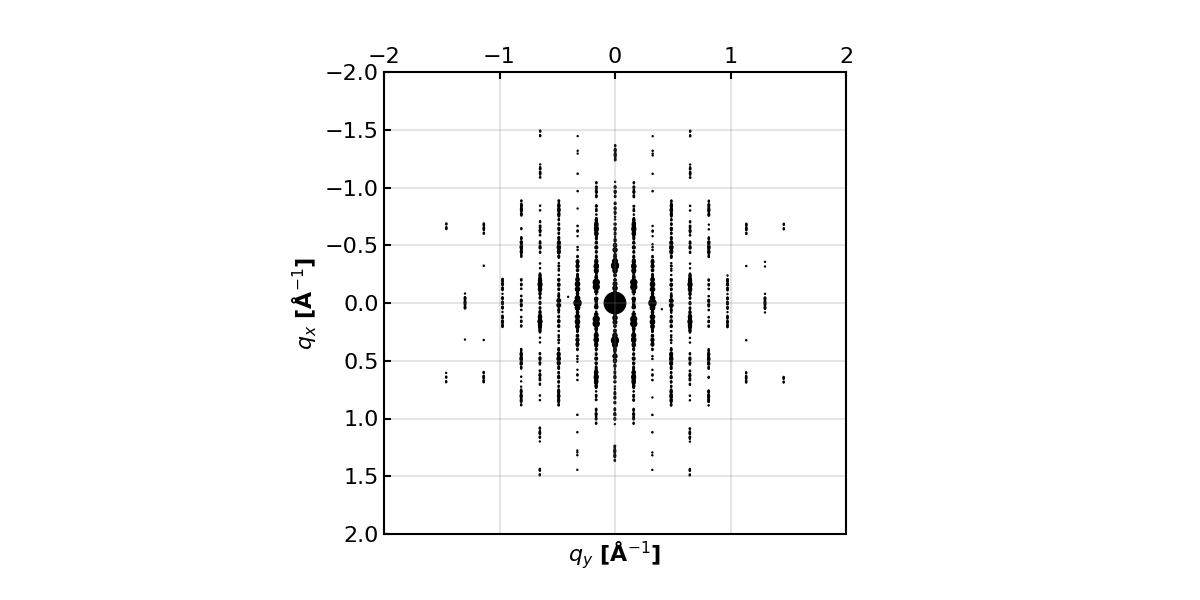

Text(0.5, 1.0, '001')

In [25]:
DP1 = crystal.generate_diffraction_pattern(
    zone_axis_lattice = (0,0,1),
    # orientation,
    # ind_orientation=0,
    tol_intensity=1e-04,
    k_max = 2,
    # tol_intensity=1e-05,
    sigma_excitation_error=0.5)

# plotting parameters
plot_params = {
    'scale_markers': 5000,
    'scale_markers_compare': 2,
    'plot_range_kx_ky': 2,
    'shift_marker': 0,
    'shift_labels': 0 ,
    # 'min_marker_size': 10,
    # scale_markers: float = 500,
    # scale_markers_compare: Optional[float] = None,
    'power_markers': 1,
    'add_labels':False,
    # 'power_markers_compare': 0,
}

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    DP1,
    # bragg_peaks_compare=bragg_peaks_cali.cal[xind,yind],
    **plot_params,
    # input_fig_handle=(fig,[ax[1]]),
)
plt.title('001')

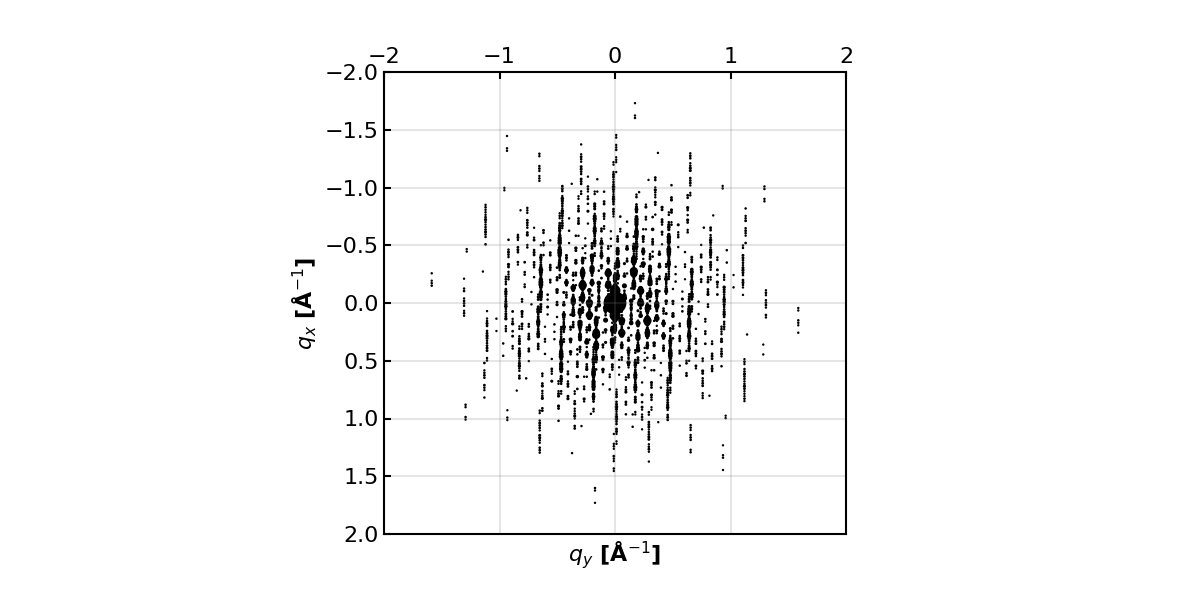

Text(0.5, 1.0, '011')

In [24]:
DP1 = crystal.generate_diffraction_pattern(
    zone_axis_lattice = (0,1,1),
    # orientation,
    # ind_orientation=0,
    tol_intensity=1e-04,
    k_max = 2,
    # tol_intensity=1e-05,
    sigma_excitation_error=0.5)

# plotting parameters
plot_params = {
    'scale_markers': 5000,
    'scale_markers_compare': 2,
    'plot_range_kx_ky': 2,
    'shift_marker': 0,
    'shift_labels': 0 ,
    # 'min_marker_size': 10,
    # scale_markers: float = 500,
    # scale_markers_compare: Optional[float] = None,
    'power_markers': 1,
    'add_labels':False,
    # 'power_markers_compare': 0,
}

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    DP1,
    # bragg_peaks_compare=bragg_peaks_cali.cal[xind,yind],
    **plot_params,
    # input_fig_handle=(fig,[ax[1]]),
)
plt.title('011')

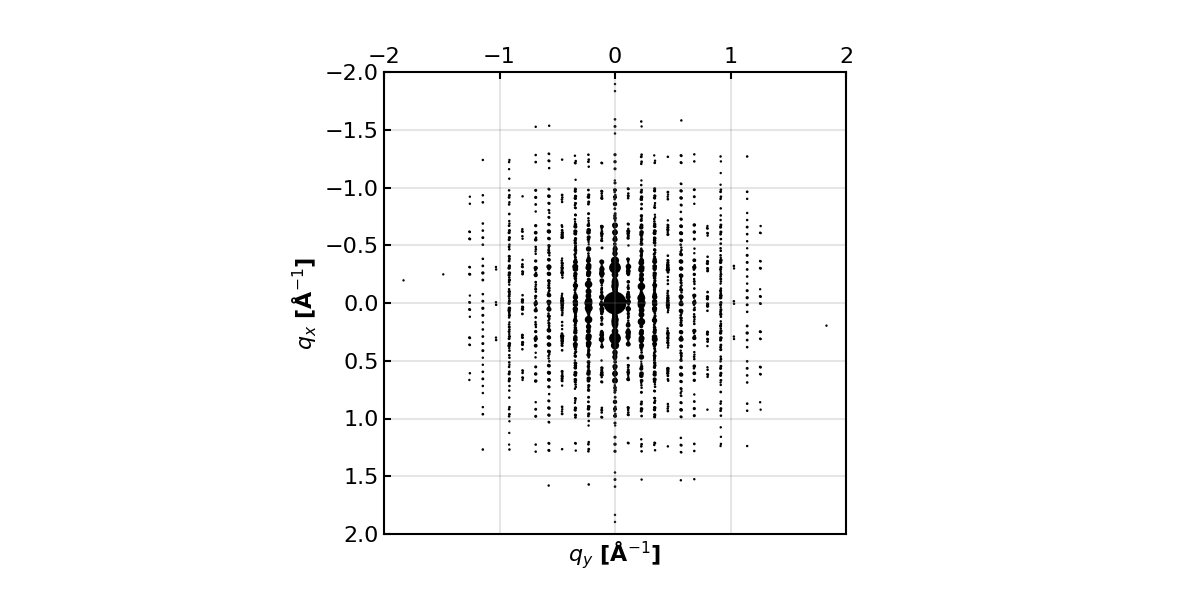

Text(0.5, 1.0, '010')

In [23]:
DP1 = crystal.generate_diffraction_pattern(
    zone_axis_lattice = (0,1,0),
    # orientation,
    # ind_orientation=0,
    tol_intensity=1e-04,
    k_max = 2,
    # tol_intensity=1e-05,
    sigma_excitation_error=0.5)

# plotting parameters
plot_params = {
    'scale_markers': 5000,
    'scale_markers_compare': 2,
    'plot_range_kx_ky': 2,
    'shift_marker': 0,
    'shift_labels': 0 ,
    # 'min_marker_size': 10,
    # scale_markers: float = 500,
    # scale_markers_compare: Optional[float] = None,
    'power_markers': 1,
    'add_labels':False,
    # 'power_markers_compare': 0,
}

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    DP1,
    # bragg_peaks_compare=bragg_peaks_cali.cal[xind,yind],
    **plot_params,
    # input_fig_handle=(fig,[ax[1]]),
)
plt.title('010')

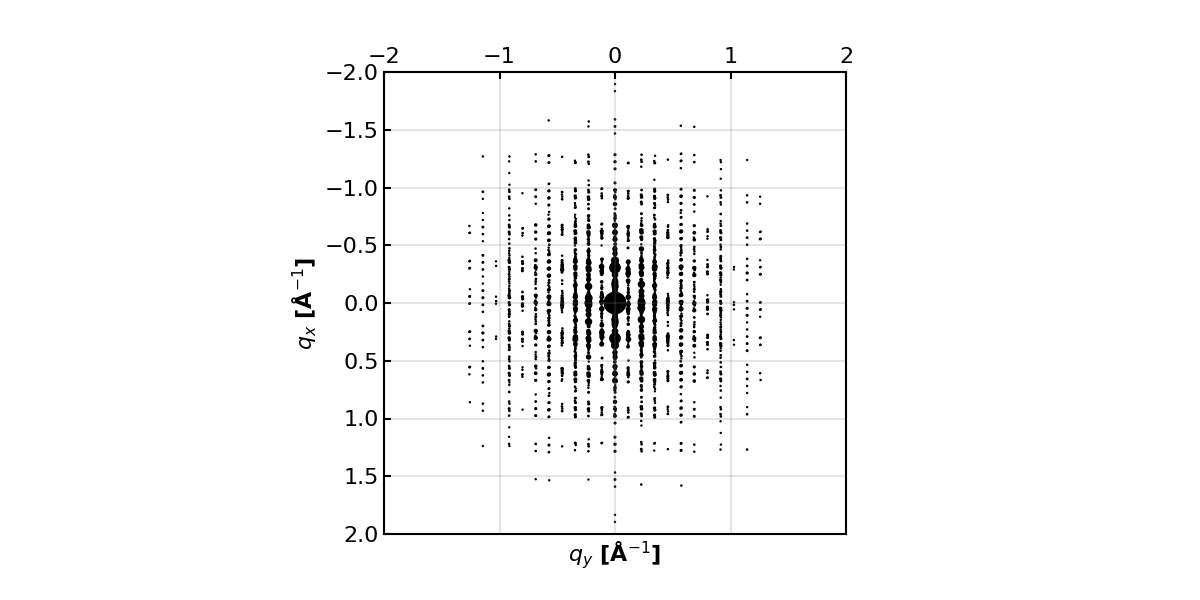

Text(0.5, 1.0, '100')

In [28]:
DP1 = crystal.generate_diffraction_pattern(
    zone_axis_lattice = (1,0,0),
    # orientation,
    # ind_orientation=0,
    tol_intensity=1e-04,
    k_max = 2,
    # tol_intensity=1e-05,
    sigma_excitation_error=0.5)

# plotting parameters
plot_params = {
    'scale_markers': 5000,
    'scale_markers_compare': 2,
    'plot_range_kx_ky': 2,
    'shift_marker': 0,
    'shift_labels': 0 ,
    # 'min_marker_size': 10,
    # scale_markers: float = 500,
    # scale_markers_compare: Optional[float] = None,
    'power_markers': 1,
    'add_labels':False,
    # 'power_markers_compare': 0,
}

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    DP1,
    # bragg_peaks_compare=bragg_peaks_cali.cal[xind,yind],
    **plot_params,
    # input_fig_handle=(fig,[ax[1]]),
)
plt.title('100')